Best Model : 10 bin hist color stacked lstm 

In [1]:

import numpy 
import matplotlib.pyplot as plt
import pandas 
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from numpy import array

from keras.layers import Input ,Dense, Dropout, Activation, LSTM
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Reshape,Conv2D
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed
#from keras.layers.pooling import GlobalAveragePooling1D
#from keras.optimizers import SGD
from keras.utils import np_utils
#from keras.models import Model

import numpy as np
import cv2
from keras.preprocessing.image import img_to_array








from keras import models

from matplotlib import pyplot
from numpy import array
from pandas import DataFrame
import numpy as np

from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot








from keras import optimizers







import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Hist of pixel 16  bin Stacked LSTM 

In [2]:
num_bins = 16
results_rmse = []
results_mae = []

In [3]:
def train_optimizer_models(opt):
    np.random.seed(3)
    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Trainold.csv')
    dataset = dataframe.values

    scaler = MinMaxScaler(feature_range=(0, 1))


    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    trainX=[]
    trainY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values
        vidImPath=vid.iloc[:,0:2].values    

        if len(total) < time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()

        for i in range(0,time_steps):
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Train/"+videoName+"/"+imgName
            image = cv2.imread(path,0)
            hist = cv2.calcHist([image],[0],None,[num_bins],[0,256])

            hist_arr = hist.flatten()
            #img_arr = img_to_array(image)
            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)

        trainX.append(histValuesList)
        trainY.append([max_total_for_vid])
        #trainY.append(scoreList)


    print(len(trainX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    trainX=numpy.array(trainX)
    trainY=numpy.array(trainY)

    print(trainX.shape,trainY.shape)





    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Test.csv')
    dataset = dataframe.values

    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    testX=[]
    testY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values

        vidImPath=vid.iloc[:,0:2].values


        if len(total)<time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()


        for i in range(0,time_steps):
            #histValuesList.append(total[i])
            #print("Vid and Img name")
            #print(req[i][0],req[i][1])
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Test/"+videoName+"/"+imgName
            image = cv2.imread(path,0)
            hist = cv2.calcHist([image],[0],None,[num_bins],[0,256])
            hist_arr = hist.flatten()

            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)


        testX.append(histValuesList)
        testY.append([max_total_for_vid])
        #testY.append(scoreList)


    print(len(testX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    testX=numpy.array(testX)
    testY=numpy.array(testY)

    print(testX.shape,testY.shape)




    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins)
    trainX=trainX.reshape(-1,19,num_bins)
    print(numpy.max(trainX))


    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins)
    testX=testX.reshape(-1,19,num_bins)
    print(numpy.max(testX))



    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins)

    trainX = trainX/numpy.max(trainX)

    trainX=trainX.reshape(-1,19,num_bins)
    print(trainX.shape,trainY.shape)




    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins)

    testX = testX/numpy.max(testX)

    testX=testX.reshape(-1,19,num_bins)
    print(testX.shape,testY.shape)



    print(trainX.shape,trainY.shape)
    print(testX.shape,testY.shape)
    #print(valX.shape,valY.shape)






    print('Build model...')
    # Build Model
    model = Sequential()  
    model.add(LSTM(100, input_shape=(19, num_bins),return_sequences=True))#100
    model.add(LSTM(50, input_shape=(19, num_bins),return_sequences=True)) #100
    model.add(LSTM(20, input_shape=(19, num_bins))) #100
    model.add(Dense(1))
    #model.add(Dropout(0.1))

    #activation=act_func, recurrent_activation=act_func,dropout=0.1,recurrent_dropout=0.1

    model.compile(loss='mse', optimizer=opt, metrics=['mse'])

    #model.compile(optimizer='adam', loss = 'mae')

    model.summary()

    history =model.fit(trainX, trainY, nb_epoch=500, batch_size=20, verbose=2,shuffle=True) #500 batch =2     



    # make predictions
    trainPredict = model.predict(trainX)


    trainScore = mean_squared_error(trainY, trainPredict)
    print('Train Score: %.2f MSE' % (trainScore))


    from keras import backend as K

    def root_mean_squared_error(y_true, y_pred):
            return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

    pred=model.predict(testX)

    print(pred.shape)
    print(testY.shape)



    # calculate root mean squared error
    #trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    #print('Train Score: %.2f RMSE' % (trainScore))
    testScore = mean_squared_error(testY, pred)
    print('Test Score: %.2f MSE' % (testScore))

    #maeScore = root_mean_squared_error(testY, pred)
    #print('RMSE Score: %.2f MAE' % (maeScore))

    rmse = np.sqrt(((pred - testY) ** 2).mean(axis=0))
    print('RMSE Score: %.2f rmse' % (rmse))


    mae = mean_absolute_error(testY, pred)
    print('MAE Score: %.2f mae' % (mae))

    for i in range(0,len(pred)):

        print(testY[i],pred[i])
        
    results_rmse.append(rmse)
    results_mae.append(mae)

In [4]:

# Stacked LSTM with 16 bin hist of pixel values

adam1 = optimizers.Adam(lr=0.001)
sgd1 = optimizers.SGD(lr=0.005) 

train_optimizer_models(sgd1)

117
19
(114, 19, 16) (114, 1)
55
19
(52, 19, 16) (52, 1)
174999.0
157653.0
(114, 19, 16) (114, 1)
(52, 19, 16) (52, 1)
(114, 19, 16) (114, 1)
(52, 19, 16) (52, 1)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 19, 100)           46800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 19, 50)            30200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                5680      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 82,701
Trainable params: 82,701
Non-trainable params: 0
_________________________________________________________________


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
 - 2s - loss: 3.1114 - mean_squared_error: 3.1114
Epoch 2/500
 - 0s - loss: 2.4352 - mean_squared_error: 2.4352
Epoch 3/500
 - 0s - loss: 1.9686 - mean_squared_error: 1.9686
Epoch 4/500
 - 0s - loss: 1.6381 - mean_squared_error: 1.6381
Epoch 5/500
 - 0s - loss: 1.4135 - mean_squared_error: 1.4135
Epoch 6/500
 - 0s - loss: 1.2673 - mean_squared_error: 1.2673
Epoch 7/500
 - 0s - loss: 1.1742 - mean_squared_error: 1.1742
Epoch 8/500
 - 0s - loss: 1.1158 - mean_squared_error: 1.1158
Epoch 9/500
 - 0s - loss: 1.0850 - mean_squared_error: 1.0850
Epoch 10/500
 - 0s - loss: 1.0617 - mean_squared_error: 1.0617
Epoch 11/500
 - 0s - loss: 1.0516 - mean_squared_error: 1.0516
Epoch 12/500
 - 0s - loss: 1.0453 - mean_squared_error: 1.0453
Epoch 13/500
 - 0s - loss: 1.0424 - mean_squared_error: 1.0424
Epoch 14/500
 - 0s - loss: 1.0432 - mean_squared_error: 1.0432
Epoch 15/500
 - 0s - loss: 1.0411 - mean_squared_error: 1.0411
Epoch 16/500
 - 0s - loss: 1.0387 - mean_squared_error: 1.0387
E

Epoch 131/500
 - 0s - loss: 1.0188 - mean_squared_error: 1.0188
Epoch 132/500
 - 0s - loss: 1.0214 - mean_squared_error: 1.0214
Epoch 133/500
 - 0s - loss: 1.0183 - mean_squared_error: 1.0183
Epoch 134/500
 - 0s - loss: 1.0198 - mean_squared_error: 1.0198
Epoch 135/500
 - 0s - loss: 1.0165 - mean_squared_error: 1.0165
Epoch 136/500
 - 0s - loss: 1.0187 - mean_squared_error: 1.0187
Epoch 137/500
 - 0s - loss: 1.0154 - mean_squared_error: 1.0154
Epoch 138/500
 - 0s - loss: 1.0158 - mean_squared_error: 1.0158
Epoch 139/500
 - 0s - loss: 1.0164 - mean_squared_error: 1.0164
Epoch 140/500
 - 0s - loss: 1.0160 - mean_squared_error: 1.0160
Epoch 141/500
 - 0s - loss: 1.0146 - mean_squared_error: 1.0146
Epoch 142/500
 - 0s - loss: 1.0141 - mean_squared_error: 1.0141
Epoch 143/500
 - 0s - loss: 1.0145 - mean_squared_error: 1.0145
Epoch 144/500
 - 0s - loss: 1.0130 - mean_squared_error: 1.0130
Epoch 145/500
 - 0s - loss: 1.0147 - mean_squared_error: 1.0147
Epoch 146/500
 - 0s - loss: 1.0146 - mea

 - 0s - loss: 0.9656 - mean_squared_error: 0.9656
Epoch 260/500
 - 0s - loss: 0.9684 - mean_squared_error: 0.9684
Epoch 261/500
 - 0s - loss: 0.9628 - mean_squared_error: 0.9628
Epoch 262/500
 - 0s - loss: 0.9690 - mean_squared_error: 0.9690
Epoch 263/500
 - 0s - loss: 0.9784 - mean_squared_error: 0.9784
Epoch 264/500
 - 0s - loss: 0.9700 - mean_squared_error: 0.9700
Epoch 265/500
 - 0s - loss: 0.9634 - mean_squared_error: 0.9634
Epoch 266/500
 - 0s - loss: 0.9637 - mean_squared_error: 0.9637
Epoch 267/500
 - 0s - loss: 0.9593 - mean_squared_error: 0.9593
Epoch 268/500
 - 0s - loss: 0.9625 - mean_squared_error: 0.9625
Epoch 269/500
 - 0s - loss: 0.9600 - mean_squared_error: 0.9600
Epoch 270/500
 - 0s - loss: 0.9601 - mean_squared_error: 0.9601
Epoch 271/500
 - 0s - loss: 0.9629 - mean_squared_error: 0.9629
Epoch 272/500
 - 0s - loss: 0.9635 - mean_squared_error: 0.9635
Epoch 273/500
 - 0s - loss: 0.9595 - mean_squared_error: 0.9595
Epoch 274/500
 - 0s - loss: 0.9618 - mean_squared_erro

Epoch 388/500
 - 0s - loss: 0.9115 - mean_squared_error: 0.9115
Epoch 389/500
 - 0s - loss: 0.9023 - mean_squared_error: 0.9023
Epoch 390/500
 - 0s - loss: 0.9317 - mean_squared_error: 0.9317
Epoch 391/500
 - 0s - loss: 0.9002 - mean_squared_error: 0.9002
Epoch 392/500
 - 0s - loss: 0.9054 - mean_squared_error: 0.9054
Epoch 393/500
 - 0s - loss: 0.9418 - mean_squared_error: 0.9418
Epoch 394/500
 - 0s - loss: 0.9031 - mean_squared_error: 0.9031
Epoch 395/500
 - 0s - loss: 0.9026 - mean_squared_error: 0.9026
Epoch 396/500
 - 0s - loss: 0.9022 - mean_squared_error: 0.9022
Epoch 397/500
 - 0s - loss: 0.9021 - mean_squared_error: 0.9021
Epoch 398/500
 - 0s - loss: 0.8939 - mean_squared_error: 0.8939
Epoch 399/500
 - 0s - loss: 0.9177 - mean_squared_error: 0.9177
Epoch 400/500
 - 0s - loss: 0.8949 - mean_squared_error: 0.8949
Epoch 401/500
 - 0s - loss: 0.9174 - mean_squared_error: 0.9174
Epoch 402/500
 - 0s - loss: 0.9382 - mean_squared_error: 0.9382
Epoch 403/500
 - 0s - loss: 0.8979 - mea

# Histogram of Color 10 bin Stacked LSTM

In [5]:
# Stacked LSTM with 10 bin hist of color values
num_bins = 10


def train_optimizer_models(opt):
    np.random.seed(3)
    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Trainold.csv')
    dataset = dataframe.values

    scaler = MinMaxScaler(feature_range=(0, 1))


    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    trainX=[]
    trainY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values
        vidImPath=vid.iloc[:,0:2].values    

        if len(total) < time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()

        for i in range(0,time_steps):
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Train/"+videoName+"/"+imgName
            image = cv2.imread(path)
            hist = cv2.calcHist([image], [0, 1, 2], None, [num_bins, num_bins, num_bins], [0, 256, 0, 256, 0, 256])
            hist_arr = hist.flatten()
            #img_arr = img_to_array(image)
            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)

        trainX.append(histValuesList)
        trainY.append([max_total_for_vid])
        #trainY.append(scoreList)


    print(len(trainX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    trainX=numpy.array(trainX)
    trainY=numpy.array(trainY)

    print(trainX.shape,trainY.shape)




    # load the dataset
    dataframe = pandas.read_csv('./Test.csv')
    dataset = dataframe.values

    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    testX=[]
    testY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values

        vidImPath=vid.iloc[:,0:2].values


        if len(total)<time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()


        for i in range(0,time_steps):
            #histValuesList.append(total[i])
            #print("Vid and Img name")
            #print(req[i][0],req[i][1])
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Test/"+videoName+"/"+imgName
            image = cv2.imread(path)
            #img_arr = img_to_array(image)
            hist = cv2.calcHist([image], [0, 1, 2], None, [num_bins, num_bins, num_bins], [0, 256, 0, 256, 0, 256])
            hist_arr = hist.flatten()

            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)


        testX.append(histValuesList)
        testY.append([max_total_for_vid])
        #testY.append(scoreList)


    print(len(testX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    testX=numpy.array(testX)
    testY=numpy.array(testY)

    print(testX.shape,testY.shape)




    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins**3)

    trainX = trainX/numpy.max(trainX)

    trainX=trainX.reshape(-1,19,num_bins**3)
    print(trainX.shape,trainY.shape)




    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins**3)

    testX = testX/numpy.max(testX)

    testX=testX.reshape(-1,19,num_bins**3)
    print(testX.shape,testY.shape)








    print('Build model...')
    # Build Model
    model = Sequential()  
    model.add(LSTM(100, input_shape=(19, num_bins**3),return_sequences=True))#100
    model.add(LSTM(50, input_shape=(19, num_bins**3),return_sequences=True)) #100
    model.add(LSTM(20, input_shape=(19, num_bins**3))) #100
    model.add(Dense(1))
    #model.add(Dropout(0.1))

    #activation=act_func, recurrent_activation=act_func,dropout=0.1,recurrent_dropout=0.1

    model.compile(loss='mse', optimizer=opt, metrics=['mse'])

    #model.compile(optimizer='adam', loss = 'mae')

    model.summary()

    history =model.fit(trainX, trainY, nb_epoch=500, batch_size=20, verbose=2,shuffle=True) #500 batch =2     



    # make predictions
    trainPredict = model.predict(trainX)


    trainScore = mean_squared_error(trainY, trainPredict)
    print('Train Score: %.2f MSE' % (trainScore))


    from keras import backend as K

    def root_mean_squared_error(y_true, y_pred):
            return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

    pred=model.predict(testX)

    print(pred.shape)
    print(testY.shape)



    # calculate root mean squared error
    #trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    #print('Train Score: %.2f RMSE' % (trainScore))
    testScore = mean_squared_error(testY, pred)
    print('Test Score: %.2f MSE' % (testScore))

    #maeScore = root_mean_squared_error(testY, pred)
    #print('RMSE Score: %.2f MAE' % (maeScore))

    rmse = np.sqrt(((pred - testY) ** 2).mean(axis=0))
    print('RMSE Score: %.2f rmse' % (rmse))


    mae = mean_absolute_error(testY, pred)
    print('MAE Score: %.2f mae' % (mae))

    for i in range(0,len(pred)):

        print(testY[i],pred[i])
        
    results_rmse.append(rmse)
    results_mae.append(mae)
    
    
    
    
    

# All parameter gradients will be clipped to
# a maximum norm of 1.

adam1 = optimizers.Adam(lr=0.001)
sgd1 = optimizers.SGD(lr=0.005) 

train_optimizer_models(sgd1)
    
    


newArr1=[]
newArr2=[]
for item in results_rmse:
    newArr1.append(float(item))
    
for item in results_mae:
    newArr2.append(float(item))


rmse_val = tuple(newArr1)
mae_val = tuple(newArr2)   



117
19
(114, 19, 1000) (114, 1)
55
19
(52, 19, 1000) (52, 1)
(114, 19, 1000) (114, 1)
(52, 19, 1000) (52, 1)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 19, 100)           440400    
_________________________________________________________________
lstm_5 (LSTM)                (None, 19, 50)            30200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 20)                5680      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 476,301
Trainable params: 476,301
Non-trainable params: 0
_________________________________________________________________


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
 - 3s - loss: 3.0962 - mean_squared_error: 3.0962
Epoch 2/500
 - 0s - loss: 2.4268 - mean_squared_error: 2.4268
Epoch 3/500
 - 0s - loss: 1.9627 - mean_squared_error: 1.9627
Epoch 4/500
 - 0s - loss: 1.6333 - mean_squared_error: 1.6333
Epoch 5/500
 - 0s - loss: 1.4096 - mean_squared_error: 1.4096
Epoch 6/500
 - 0s - loss: 1.2641 - mean_squared_error: 1.2641
Epoch 7/500
 - 0s - loss: 1.1716 - mean_squared_error: 1.1716
Epoch 8/500
 - 0s - loss: 1.1137 - mean_squared_error: 1.1137
Epoch 9/500
 - 0s - loss: 1.0833 - mean_squared_error: 1.0833
Epoch 10/500
 - 0s - loss: 1.0602 - mean_squared_error: 1.0602
Epoch 11/500
 - 0s - loss: 1.0503 - mean_squared_error: 1.0503
Epoch 12/500
 - 0s - loss: 1.0443 - mean_squared_error: 1.0443
Epoch 13/500
 - 0s - loss: 1.0415 - mean_squared_error: 1.0415
Epoch 14/500
 - 0s - loss: 1.0424 - mean_squared_error: 1.0424
Epoch 15/500
 - 1s - loss: 1.0403 - mean_squared_error: 1.0403
Epoch 16/500
 - 1s - loss: 1.0380 - mean_squared_error: 1.0380
E

Epoch 131/500
 - 1s - loss: 1.0266 - mean_squared_error: 1.0266
Epoch 132/500
 - 0s - loss: 1.0288 - mean_squared_error: 1.0288
Epoch 133/500
 - 1s - loss: 1.0261 - mean_squared_error: 1.0261
Epoch 134/500
 - 0s - loss: 1.0276 - mean_squared_error: 1.0276
Epoch 135/500
 - 0s - loss: 1.0248 - mean_squared_error: 1.0248
Epoch 136/500
 - 0s - loss: 1.0268 - mean_squared_error: 1.0268
Epoch 137/500
 - 0s - loss: 1.0239 - mean_squared_error: 1.0239
Epoch 138/500
 - 0s - loss: 1.0243 - mean_squared_error: 1.0243
Epoch 139/500
 - 0s - loss: 1.0250 - mean_squared_error: 1.0250
Epoch 140/500
 - 0s - loss: 1.0246 - mean_squared_error: 1.0246
Epoch 141/500
 - 1s - loss: 1.0234 - mean_squared_error: 1.0234
Epoch 142/500
 - 0s - loss: 1.0231 - mean_squared_error: 1.0231
Epoch 143/500
 - 0s - loss: 1.0236 - mean_squared_error: 1.0236
Epoch 144/500
 - 0s - loss: 1.0224 - mean_squared_error: 1.0224
Epoch 145/500
 - 0s - loss: 1.0240 - mean_squared_error: 1.0240
Epoch 146/500
 - 1s - loss: 1.0238 - mea

 - 0s - loss: 0.9930 - mean_squared_error: 0.9930
Epoch 260/500
 - 0s - loss: 0.9935 - mean_squared_error: 0.9935
Epoch 261/500
 - 0s - loss: 0.9907 - mean_squared_error: 0.9907
Epoch 262/500
 - 0s - loss: 0.9935 - mean_squared_error: 0.9935
Epoch 263/500
 - 0s - loss: 0.9995 - mean_squared_error: 0.9995
Epoch 264/500
 - 0s - loss: 0.9950 - mean_squared_error: 0.9950
Epoch 265/500
 - 0s - loss: 0.9907 - mean_squared_error: 0.9907
Epoch 266/500
 - 0s - loss: 0.9902 - mean_squared_error: 0.9902
Epoch 267/500
 - 0s - loss: 0.9874 - mean_squared_error: 0.9874
Epoch 268/500
 - 0s - loss: 0.9888 - mean_squared_error: 0.9888
Epoch 269/500
 - 0s - loss: 0.9875 - mean_squared_error: 0.9875
Epoch 270/500
 - 0s - loss: 0.9872 - mean_squared_error: 0.9872
Epoch 271/500
 - 0s - loss: 0.9877 - mean_squared_error: 0.9877
Epoch 272/500
 - 0s - loss: 0.9882 - mean_squared_error: 0.9882
Epoch 273/500
 - 0s - loss: 0.9864 - mean_squared_error: 0.9864
Epoch 274/500
 - 0s - loss: 0.9876 - mean_squared_erro

Epoch 388/500
 - 0s - loss: 0.8959 - mean_squared_error: 0.8959
Epoch 389/500
 - 0s - loss: 0.8828 - mean_squared_error: 0.8828
Epoch 390/500
 - 1s - loss: 0.9065 - mean_squared_error: 0.9065
Epoch 391/500
 - 0s - loss: 0.8845 - mean_squared_error: 0.8845
Epoch 392/500
 - 0s - loss: 0.8930 - mean_squared_error: 0.8930
Epoch 393/500
 - 0s - loss: 0.9224 - mean_squared_error: 0.9224
Epoch 394/500
 - 0s - loss: 0.8861 - mean_squared_error: 0.8861
Epoch 395/500
 - 0s - loss: 0.8850 - mean_squared_error: 0.8850
Epoch 396/500
 - 0s - loss: 0.8802 - mean_squared_error: 0.8802
Epoch 397/500
 - 0s - loss: 0.8836 - mean_squared_error: 0.8836
Epoch 398/500
 - 0s - loss: 0.8804 - mean_squared_error: 0.8804
Epoch 399/500
 - 0s - loss: 0.8946 - mean_squared_error: 0.8946
Epoch 400/500
 - 0s - loss: 0.8768 - mean_squared_error: 0.8768
Epoch 401/500
 - 1s - loss: 0.8886 - mean_squared_error: 0.8886
Epoch 402/500
 - 0s - loss: 0.9141 - mean_squared_error: 0.9141
Epoch 403/500
 - 0s - loss: 0.8776 - mea

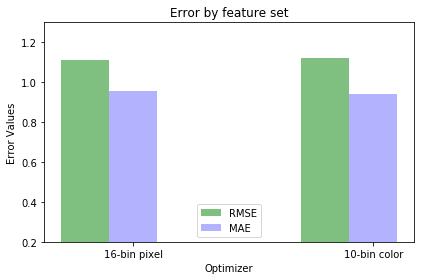

In [6]:

# data to plot
n_groups = 2


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, rmse_val, bar_width,alpha=0.5,color='g',label='RMSE')
 
rects2 = plt.bar(index + bar_width, mae_val, bar_width,alpha=0.3,color='b',label='MAE')
 
    
plt.xlabel('Optimizer')
plt.ylabel('Error Values')
plt.title('Error by feature set')
plt.xticks(index + bar_width, ('16-bin pixel','10-bin color'))
plt.legend()
 
plt.tight_layout()

axes = plt.gca()
axes.set_ylim([0.20,1.3])

plt.show()
